### 代码框8-1 单因子方差分析

In [3]:
#将8-1的短格式数据融合成长格式数据，并另存为8-2
import pandas as pd
example8_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_1.csv',encoding='gbk')
example8_2 = pd.melt(example8_1, value_vars=['品种1','品种2','品种3'], var_name='品种', value_name='产量')
example8_2.to_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk', index=True)   #保存融合后的数据
example8_2           #展示数据前5行

,品种,产量
0,品种1,81
1,品种1,82
2,品种1,79
3,品种1,81
4,品种1,78
5,品种1,89
6,品种1,92
7,品种1,87
8,品种1,85
9,品种1,86


In [5]:
#拟合单因子方差分析模型并输出方差分析表
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk',')
model = ols(formula='产量~品种', data = example8_2).fit()
anova_lm(model, typ=1)             #typ用于指定误差平方和类型，可选{1,2,3}

,df,sum_sq,mean_sq,F,PR(>F)
品种,2.0,560.0,280.000000,12.312704,0.000158
Residual,27.0,614.0,22.740741,NaN,NaN


### 代码框8-2 输出方差分析的模型摘要

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     产量   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     12.31
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           0.000158
Time:                        20:53:02   Log-Likelihood:                -87.850
No. Observations:                  30   AIC:                             181.7
Df Residuals:                      27   BIC:                             185.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0000      1.508     55.703      0.0

### 代码框8-3 绘制样本的均值图

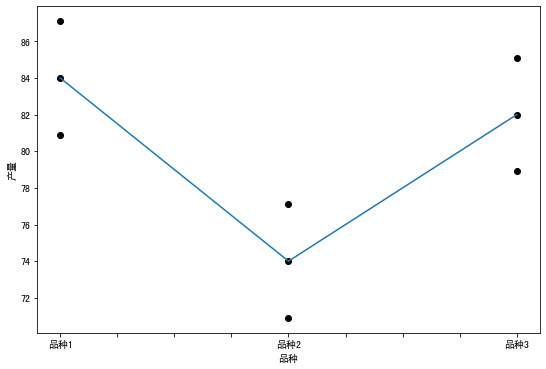

In [6]:
#图8-2的绘制代码
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# from pylab import mpl
# mpl.rcParams['font.sans-serif'] = ['FangSong']  # 设置matplotlib可以显示汉语
# mpl.rcParams['axes.unicode_minus'] = False

example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk')
model = ols(formula='产量~品种', data = example8_2).fit()
mean = model.params.values[0]
lci, uci = model.conf_int().iloc[0].values
df_mean = pd.DataFrame([lci, mean, uci], index= ['lci','mean','uci'], columns=['品种1'])
df_mean['品种2'] = df_mean['品种1'] + model.params.values[1]
df_mean['品种3'] = df_mean['品种1'] + model.params.values[2]
ax = df_mean.T.plot(ls='', marker='o', legend=False, c='black', figsize=(9,6), xlabel='品种', ylabel='产量')
ax = df_mean.loc['mean'].plot()

### 代码框8-4 计算8-2的效应量

In [5]:
import pandas as pd
from statsmodels.formula.api import ols
example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk')
model = ols(formula='产量~品种',data= example8_2).fit()
print('效应量',round(model.rsquared, 4))

效应量 0.477


### 代码框8-5 多重比较的HSD法

In [7]:
import pandas as pd
from statsmodels.stats.multicomp import MultiComparison
example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk')
mc = MultiComparison(example8_2['产量'], groups=example8_2['品种'])
print(mc.tukeyhsd(alpha=0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   品种1    品种2    -10.0  0.001 -15.2867 -4.7133   True
   品种1    品种3     -2.0 0.6149  -7.2867  3.2867  False
   品种2    品种3      8.0 0.0024   2.7133 13.2867   True
-----------------------------------------------------


### 代码框8-6 主效应方差分析

In [10]:
#将表格8—4数据转化为长格式，另存为example8_4
import  pandas as pd
example8_4 = pd.read_csv(r'F:\JupyterData\Statistics_Pythoncoding\data\chap08\table8_4.csv', encoding='gbk')
example8_5 = pd.melt(example8_4, id_vars=['施肥方式'], value_vars=['品种1','品种2','品种3'], var_name='品种', value_name='产量')
#s输出主效应方差分析表
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
model2m = ols(formula='产量~品种+施肥方式', data= example8_4).fit()  #拟合主效应模型
anova_lm(model2m, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
品种,2.0,560.0,280.000000,54.328358,5.184290e-10
施肥方式,1.0,480.0,480.000000,93.134328,4.422633e-10
Residual,26.0,134.0,5.153846,NaN,NaN


In [11]:
#输出模型其他信息
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     产量   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     12.31
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           0.000158
Time:                        15:44:17   Log-Likelihood:                -87.850
No. Observations:                  30   AIC:                             181.7
Df Residuals:                      27   BIC:                             185.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0000      1.508     55.703      0.0

### 代码框8-7 主效应方差分析的效应量

In [13]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
model = ols(formula='产量~品种+施肥方式', data=example8_4).fit()
df_res = anova_lm(model, typ=1)
df_res['eta_sq'] = df_res['sum_sq']/df_res['sum_sq'].sum()   #计算主效应量
df_res['eta_sq_part'] = df_res['sum_sq']/(df_res['sum_sq'] + df_res.loc['Residual', 'sum_sq'])  #计算偏效应量
df_res.loc['Residual','eta_sq_part'] = np.nan
df_res

,df,sum_sq,mean_sq,F,PR(>F),eta_sq,eta_sq_part
品种,2.0,560.0,280.000000,54.328358,5.184290e-10,0.477002,0.806916
施肥方式,1.0,480.0,480.000000,93.134328,4.422633e-10,0.408859,0.781759
Residual,26.0,134.0,5.153846,NaN,NaN,0.114140,NaN


### 代码框8-8 交互效应的方差分析

In [14]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
model2i = ols(formula='产量~品种+施肥方式+品种:施肥方式', data=example8_4).fit()
anova_lm(model2i, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
品种,2.0,560.0,280.00,54.368932,1.220666e-09
施肥方式,1.0,480.0,480.00,93.203883,9.729467e-10
品种:施肥方式,2.0,10.4,5.20,1.009709,3.792836e-01
Residual,24.0,123.6,5.15,NaN,NaN


In [15]:
#输出模型其他信息
print(model2i.summary())

                            OLS Regression Results                            
Dep. Variable:                     产量   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     40.79
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           5.77e-11
Time:                        16:04:08   Log-Likelihood:                -63.806
No. Observations:                  30   AIC:                             139.6
Df Residuals:                      24   BIC:                             148.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              87.8000    

### 代码框8-9 绘制品种和施肥方式的主效应和交互效应图

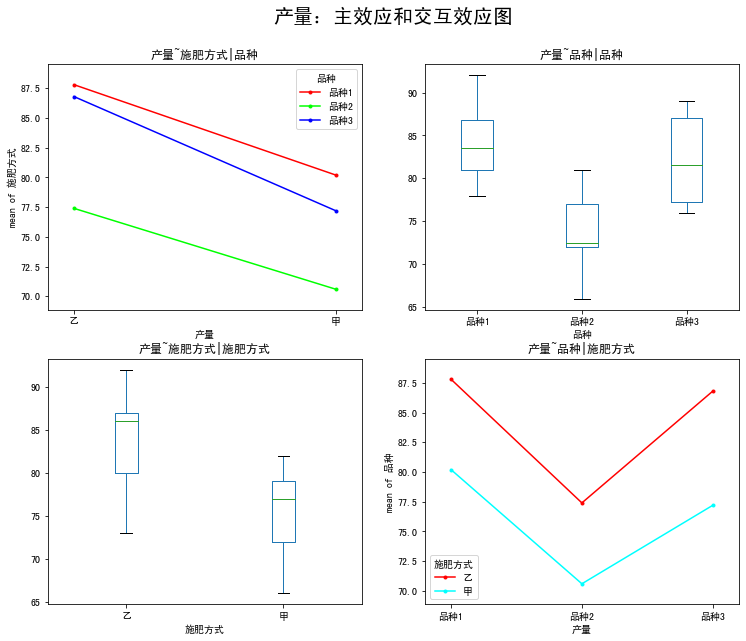

In [11]:
#图8-5的绘制代码
import pandas as pd
from statsmodels.graphics.api import interaction_plot
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
y_col = '产量'; x1_col='品种'; x2_col= '施肥方式'
plt.subplots(2,2, figsize=(12,10))
ax1=plt.subplot(221)
interaction_plot(x=example8_4[x2_col],trace=example8_4[x1_col],response=example8_4[y_col],xlabel=y_col, ylabel=x2_col, ax=ax1)
ax1.set_title(f'{y_col}~{x2_col}|{x1_col}')
ax2 = plt.subplot(222)
example8_4.boxplot(column=y_col, by=x1_col,grid=False,ax=ax2)
ax2.set_title(f'{y_col}~{x1_col}|{x1_col}')
ax3 = plt.subplot(223)
example8_4.boxplot(column=y_col, by=x2_col, grid=False, ax=ax3)
ax3.set_title(f'{y_col}~{x2_col}|{x2_col}')
ax4= plt.subplot(224)
interaction_plot(x=example8_4[x1_col],trace=example8_4[x2_col],response=example8_4[y_col],xlabel=y_col,ylabel=x1_col,ax=ax4)
ax4.set_title(f'{y_col}~{x1_col}|{x2_col}')
plt.suptitle('产量：主效应和交互效应图',fontsize=20)
plt.show()
              
              

### 代码框8-10 交互效应方差分析的效应量

In [18]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
model2i = ols(formula='产量~品种+施肥方式+品种:施肥方式',data=example8_4).fit()
df_res = anova_lm(model2i, typ=1)
df_res['eta_sq'] = df_res['sum_sq']/df_res['sum_sq'].sum()
df_res['eta_sq_part'] = df_res['sum_sq']/(df_res['sum_sq'] + df_res.loc['Residual','sum_sq'])
df_res.loc['Residual','eta_sq_part'] = np.nan
df_res

,df,sum_sq,mean_sq,F,PR(>F),eta_sq,eta_sq_part
品种,2.0,560.0,280.00,54.368932,1.220666e-09,0.477002,0.819193
施肥方式,1.0,480.0,480.00,93.203883,9.729467e-10,0.408859,0.795229
品种:施肥方式,2.0,10.4,5.20,1.009709,3.792836e-01,0.008859,0.077612
Residual,24.0,123.6,5.15,NaN,NaN,0.105281,NaN


### 代码框8-11 用QQ途检验正态性

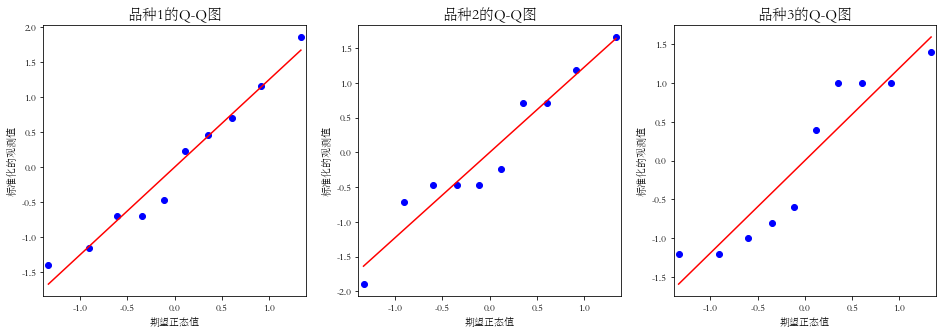

In [13]:
#图8-6的绘制代码（每个品种产量的正态Q-Q图）
import pandas as pd
import statsmodels.api as sm
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False
example8_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_1.csv',encoding='gbk')
plt.subplots(1,3,figsize=(16,5))
ax1 = plt.subplot(131)
pplot_1 = sm.ProbPlot(example8_1['品种1'],fit=True)
pplot_1.qqplot(line='r',ax=ax1,xlabel='期望正态值',ylabel='标准化的观测值')
ax1.set_title('品种1的Q-Q图', fontsize=15)
ax2 = plt.subplot(132)
pplot_2 = sm.ProbPlot(example8_1['品种2'],fit=True)
pplot_2.qqplot(line='r',ax=ax2,xlabel='期望正态值',ylabel='标准化的观测值')
ax2.set_title('品种2的Q-Q图',fontsize=15)
ax3=plt.subplot(133)
pplot_3 = sm.ProbPlot(example8_1['品种3'],fit=True)
pplot_3.qqplot(line='r',ax=ax3,xlabel='期望正态值',ylabel='标准化的观测值')
ax3.set_title('品种3的Q-Q图', fontsize=15)
plt.show()

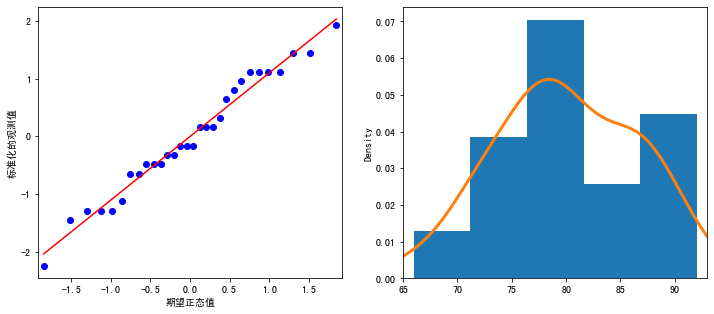

In [17]:
#图8-7的绘制代码（三个品种产量数据合并后的正态Q-Q图，直方图，核密度曲线）
import pandas as pd 
import statsmodels.api as sm
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk')
plt.subplots(1,2,figsize=(12,5))
ax1=plt.subplot(121)
pplot = sm.ProbPlot(example8_2['产量'],fit=True)
pplot.qqplot(line='r', ax=ax1, xlabel='期望正态值',ylabel='标准化的观测值')
ax2 = plt.subplot(122)
example8_2['产量'].plot(bins=5, kind='hist',ax=ax2,density=True,legend=False)
example8_2['产量'].plot(kind='density', ax=ax2, linewidth=3)
ax2.set_xlim(65,93)
plt.show()

### 代码框8-12 S-W和K-S正态性检验

In [23]:
#S-W正态性检验
import pandas as pd
from scipy.stats import shapiro
example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk')
w, p_value = shapiro(example8_2['产量'])
print('统计量',round(w,5),'p值',round(p_value,4))

统计量 0.97299 p值 0.6237


In [26]:
#K-S正态性检验
import pandas as pd
from scipy.stats import kstest
example8_2 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_2.csv',encoding='gbk')
D, p_value = kstest(example8_2['产量'],'norm',alternative='two-sided',mode='asymp',args=(example8_2['产量'].mean(),example8_2['产量'].std()))
print('统计量',round(D,5),'P值',round(p_value,4))


统计量 0.09771 P值 0.9369


### 代码框8-13 用残差图检验方差齐性

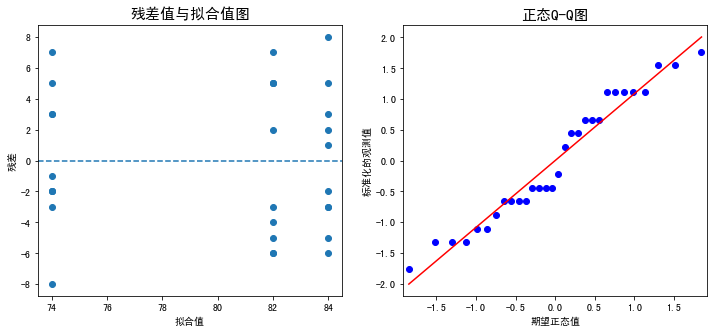

In [4]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
example8_2 = pd.read_csv('Bartlettk')
model = ols(formula='产量~品种', data=example8_2).fit()
plt.subplots(1,2,figsize=(12,5))
plt.subplot(121)
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('残差值与拟合值图', fontsize=15)
plt.axhline(0, ls='--')
ax2 = plt.subplot(122)
pplot = sm.ProbPlot(model.resid,fit=True)
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值')
ax2.set_title('正态Q-Q图', fontsize=15)
plt.show()

### 代码框8-14 Bartlett方差齐性检验

In [6]:
#不同品种产量的Bartlett检验
import pandas as pd
from scipy.stats import bartlett
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
sample1 = example8_4.loc[example8_4['品种']=='品种1','产量'].values
sample2 = example8_4.loc[example8_4['品种']=='品种2','产量'].values
sample3 = example8_4.loc[example8_4['品种']=='品种3','产量'].values
B, p_value = bartlett(sample1, sample2, sample3)
print('统计量',round(B,5),'P值',round(p_value,4))

统计量 0.30152 P值 0.8601


In [7]:
#不同施肥方式的Bartlett检验
import pandas as pd
from scipy.stats import bartlett
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
sample1 = example8_4.loc[example8_4['施肥方式']=='甲','产量'].values
sample2 = example8_4.loc[example8_4['施肥方式']=='乙','产量'].values
B, p_value = bartlett(sample1,sample2)
print('统计量',round(B,5),'P值',round(p_value,4))

统计量 0.42431 P值 0.5148


### 代码框8-15 levene方差齐性检验

In [8]:
#不同品种产量的levene检验
import pandas as pd
from scipy.stats import levene
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
sample1 = example8_4.loc[example8_4['品种']=='品种1', '产量'].values
sample2 = example8_4.loc[example8_4['品种']=='品种2', '产量'].values
sample3 = example8_4.loc[example8_4['品种']=='品种3', '产量'].values
F, p_value=levene(sample1, sample2, sample3)
print('统计量',round(F,5),'P值',round(p_value,4))

统计量 0.92919 P值 0.4071


In [9]:
#不同施肥方式的levene检验
import pandas as pd
from scipy.stats import levene
example8_4 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap08\example8_4.csv',encoding='gbk')
sample1 = example8_4.loc[example8_4['施肥方式']=='甲','产量'].values
sample2 = example8_4.loc[example8_4['施肥方式']=='乙','产量'].values
F, p_value=levene(sample1, sample2)
print('统计量',round(F,5),'P值',round(p_value,4))

统计量 0.23228 P值 0.6336
